# Assignment 2
This is due by 5pm on Friday 21st February. The mark breakdown is:

- Q0 [1 marks]
- Q1 [10 marks]
- Q2 [10 marks]
- Q3 [9 marks]

It is adviseable that you tidy up your notebook before submitting the final version. Also, remember to add comments to your code.

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1: Bisection method

### Q. 1a
Define a function for the quintic $f(x) = x^5+12 x^4-15 x^3-386 x^2-180 x+1800$ and plot it in the range $x=-11\dots6$

In [5]:
def f(x): #Defining the function 
    y = x**5 + 12*(x**4) - 15*(x**3) - 386*(x**2) - 180*x + 1800 
    return y


In [6]:
x = np.arange(-11, 7, 0.01) #Implented a range with intervals every 0.1 to obtain a smoother function 
vf = np.vectorize(f) #Takes many nested arrays and turns into 1
y = vf(x) #computing function output for the range

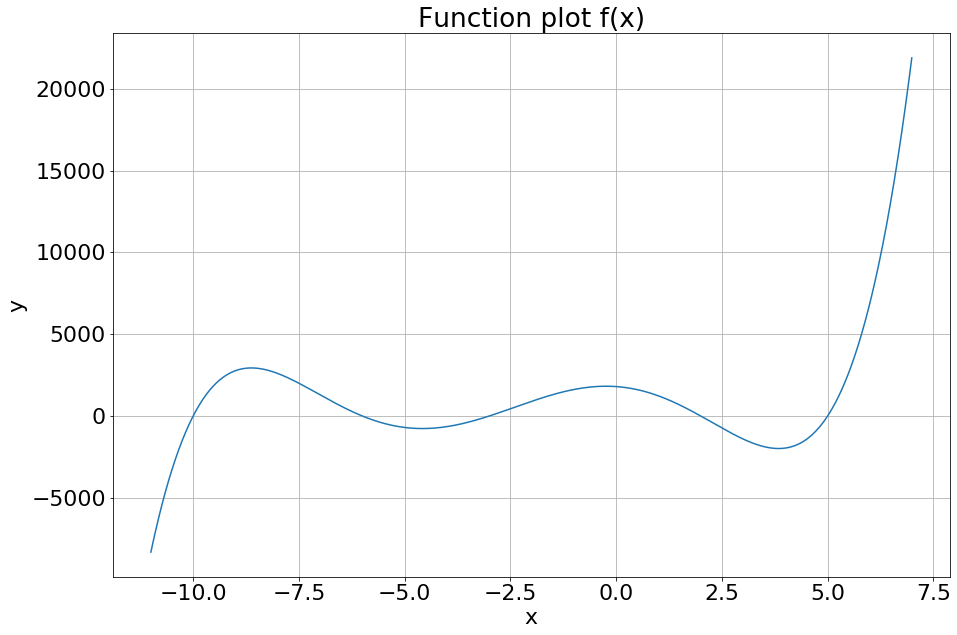

In [7]:
fig, ax = plt.subplots() #standard plot 
ax.plot(x, y, 0.01)
ax.set(xlabel='x', ylabel='y',
       title='Function plot f(x)')
ax.grid()

plt.show()

### Q. 1b
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.

In [8]:
print("f(8) =", f(8))

print("f(-11) =", f(-11)) #printing the outputs for required functions

f(8) = 49896
f(-11) = -8320


Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [9]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [10]:
FindRootBisection(f, -11, 8, 10**-12) #Inputting values to find root Bisection to questions specifications

-9.999999999999972

### Q. 1c
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that: 
 - **also** works when $f(a) > 0 > f(b)$. 
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "Cannot use bisection method as sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values
 
Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = 2.5$ and $x=6$
 - attempting to find a root between $x=6$ and $x=8$ (there is no root in this region)

In [68]:
#Updated Function 
def FindRootBisection(f, a, b, tol, printSteps=False):
    if np.sign(f(a)) == np.sign(f(b)): #Checks signs 
        print("Cannot use bisection method as sign(f(", a,")) = sign(f(", b,"))")
    else:
        if a > 0 > b: 
            left = b
            right = a
        else: #Loops that deceiper what attribute a and b get assigned 
            left = a
            right = b 
        while right-left > tol:
            midpoint = (left+right)/2
            if(f(midpoint) < 0):
                left = midpoint
            else:
                right = midpoint
            if(printSteps == True):
                print(midpoint)
        return midpoint
    

In [28]:
FindRootBisection(f, 2.5, 6, 10**-12) #outputs to test if function has worked

4.999999999999432

In [69]:
FindRootBisection(f, 6, 8, 10**-12) #outputs to test function has worked 

Cannot use bisection method as sign(f( 6 )) = sign(f( 8 ))


**Commit this question to your git repository and push the changes to GitHub**

## Question 2: Newton-Raphson method

### Q. 2a
 - Define a function $p(x) = \sinh^{-1} x$. Calculate its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-11$ and $x=6$. Label the plot axes and use a grid.

In [33]:
def p(x): 
    return np.arcsinh(x) #defining intial function 

In [35]:
def dp(x):
    return (1)/np.sqrt(1 + (x**2)) #defining the deriviative of the function which was calculated by hand.

In [46]:
x = np.arange(-11, 7, 0.01) 
y = p(x) #defining ranges for the plot 

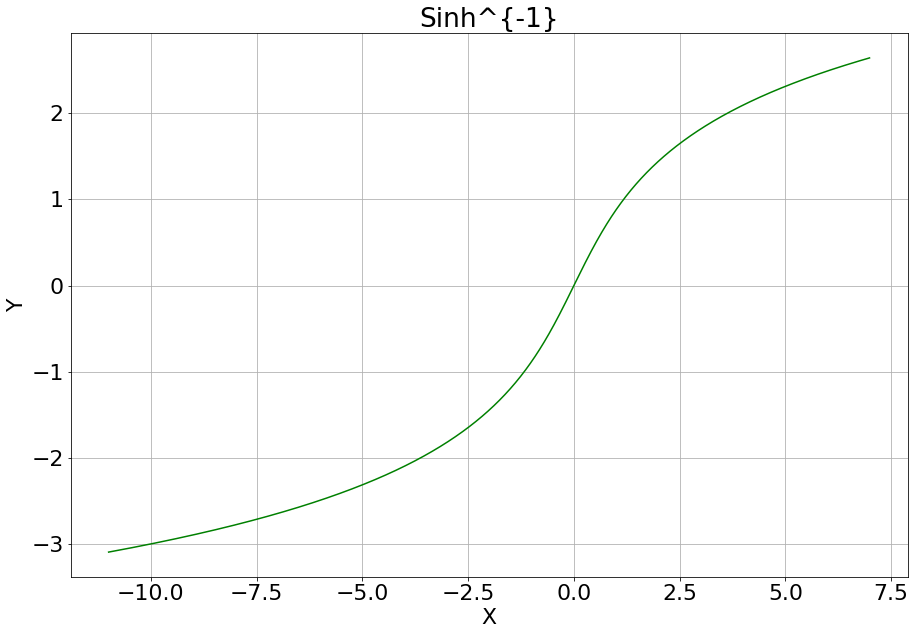

In [47]:
plt.plot(x, y, color = 'green') #standard plot 
plt.title("Sinh^{-1}") 
plt.xlabel("X") 
plt.grid(True)
plt.ylabel("Y") 
plt.show() 

### Q. 2b
 - Starting with a value near the root use the below Newton-Raphson code to find the root

In [48]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps):
            print("x_%d = %.14lf" % (count, x0))
    return x0

In [37]:
FindRootNewtonRaphson(p, dp, 1, 10**(-12), True) #finding the root near at 1 which thus finds root to be at 0 
#This can be seen in the plot above to be correct

x_2 = -0.24645048028046
x_3 = 0.00487244381746
x_4 = -0.00000003855806
x_5 = 0.00000000000000
x_6 = 0.00000000000000


0.0

### Q. 2c
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) with labels and a grid

In [40]:
def F(x):
    return = x - p(x)/dp(x) 
    #Defining both functions as detailed by the above question 
def F2(x):
    return F(F(x)) - x

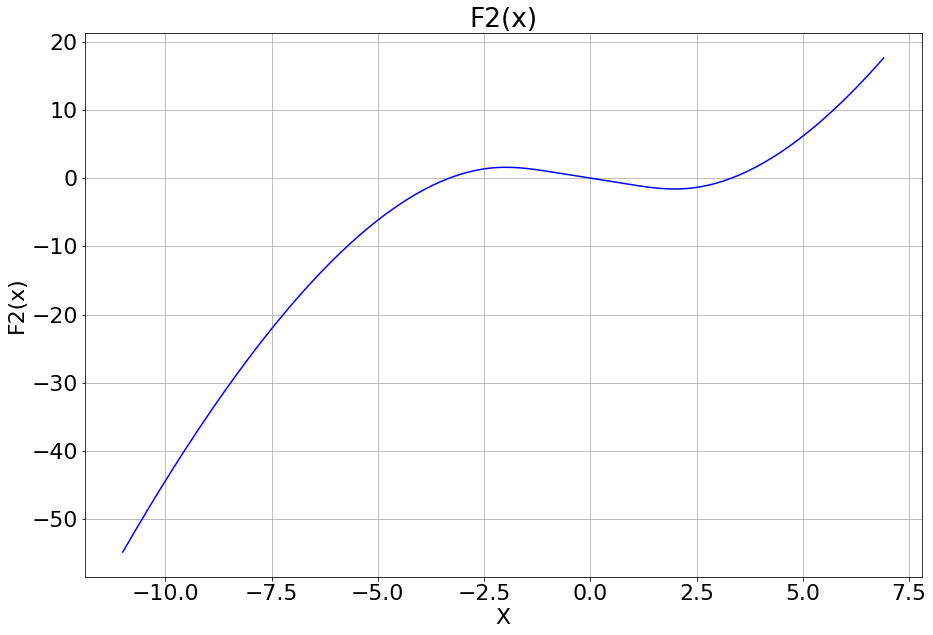

In [41]:
plt.plot(x, F2(x), color = 'blue') #standard plot 
plt.title("F2(x)") 
plt.xlabel("X") 
plt.ylabel("F2(x)") 
plt.grid(True)
plt.show() 

- We want to find a root with $x \neq 0$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root of $F2(x)$ to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the vaue of the root of the variable 'x2' and also print(x2).
- Use the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and the algorithm does not converge.

In [51]:
x2 = FindRootBisection(F2, 2.5, 5, 10**(-15))

print(x2)

3.319826386395148


In [50]:
x_f = FindRootBisection(p, dp, x2, 10**(-15), True)

TypeError: loop of ufunc does not support argument 0 of type function which has no callable arcsinh method

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge?
 
In both cases set the final argument to 'True' to get the function to print the steps the method is taking

In [25]:
FindRootBisection(p, dp, x2 + 10**(-3), 10**(-15), True) #This value diverges when addition occurs 


FindRootBisection(p, dp, x2 - 10**(-3), 10**(-15), True) #This value converges when subtraction occurs 

TypeError: loop of ufunc does not support argument 0 of type function which has no callable arcsinh method

**Commit this question to your git repository and push the changes to GitHub**

## Question 3: Slow convergence of the Newton-Raphson method at repeated roots
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x-2)^2(x+1)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots3$

In [66]:
def g(x):
    return (x - 2)**(2)*(x + 1)

def dg(x):
    return (3*(x**2) - 6*x) #defining the functions 


In [65]:
x = np.arange(-2, 4, 0.01)

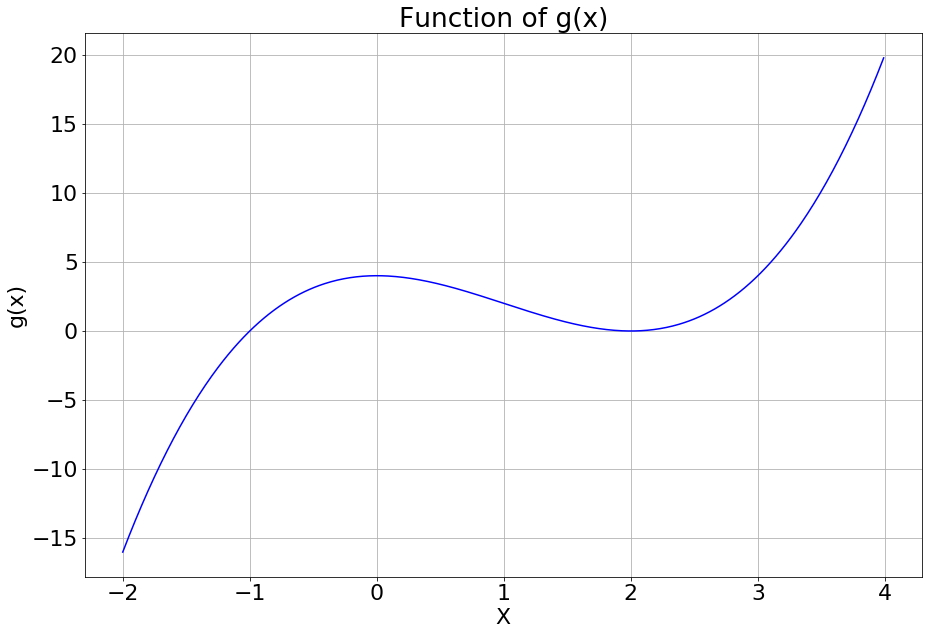

In [67]:
plt.plot(x, g(x), color = 'blue') 
plt.title("Function of g(x)") 
plt.xlabel("X") 
plt.ylabel("g(x)") 
plt.grid(True)
plt.show() 

Run the FindRootNewtonRaphson function with the final (optional) argument set to True to see the steps the algorithm takes. Run it with:
 - the initial value of $x_0 = 3$
 - the initial value of $x_0 = -2$

In [55]:
FindRootNewtonRaphson(g, dg, 3, 10**(-12), True)

x_2 = 2.55555555555556
x_3 = 2.29790660225443
x_4 = 2.15539019921377
x_5 = 2.07956221041436
x_6 = 2.04028843517102
x_7 = 2.02027680978673
x_8 = 2.01017232343142
x_9 = 2.00509474109328
x_10 = 2.00254952808283
x_11 = 2.00127530502624
x_12 = 2.00063778796033
x_13 = 2.00031892786715
x_14 = 2.00015947240847
x_15 = 2.00007973832335
x_16 = 2.00003986969151
x_17 = 2.00001993497822
x_18 = 2.00000996752222
x_19 = 2.00000498376939
x_20 = 2.00000249188677


2.0000024918867654

In [56]:
FindRootNewtonRaphson(g, dg, -2, 10**(-12), True)

x_2 = -1.33333333333333
x_3 = -1.05555555555556
x_4 = -1.00194931773879
x_5 = -1.00000252829797
x_6 = -1.00000000000426
x_7 = -1.00000000000000
x_8 = -1.00000000000000


-1.0

What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [57]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 3$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -2$. Assign the result to a different variable.

In [58]:
r_1 = FindRootNewtonRaphsonSteps(g, dg, 3, 10**(-15))

r_2 = FindRootNewtonRaphsonSteps (g, dg, -2, 10**(-15))

print(r_1, r_2)

[3.         2.55555556 2.2979066  2.1553902  2.07956221 2.04028844
 2.02027681 2.01017232 2.00509474 2.00254953 2.00127531 2.00063779
 2.00031893 2.00015947 2.00007974 2.00003987 2.00001993 2.00000997
 2.00000498 2.00000249 2.00000125 2.00000062 2.00000031 2.00000016
 2.00000008 2.00000004 2.00000002 2.00000001 2.        ] [-2.         -1.33333333 -1.05555556 -1.00194932 -1.00000253 -1.
 -1.         -1.        ]


Plot the absolute difference between the steps and the root, i.e., $|x_n - x_*|$, on a log scale.

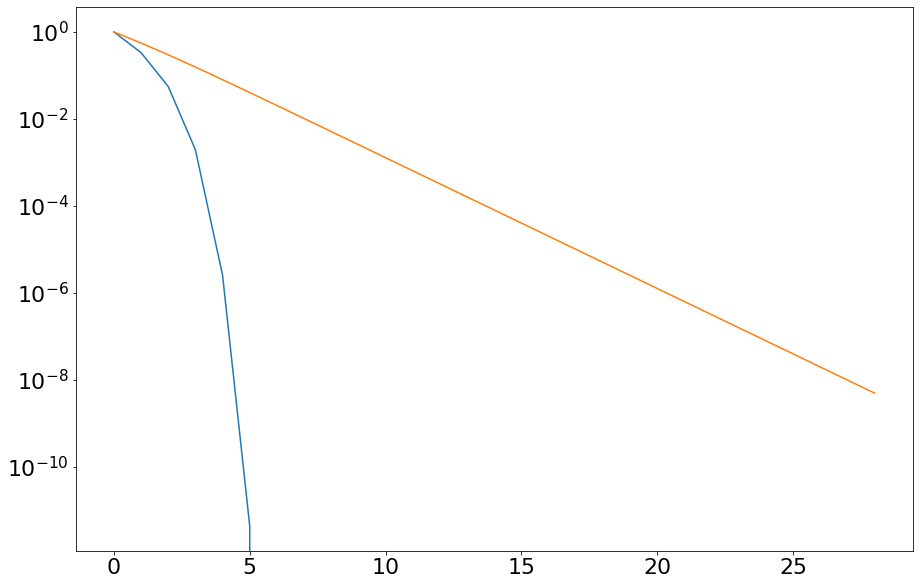

In [64]:
absolute_value_r_1 = abs(r_1 - 2) #calculating absolute values
absolute_value_r_2 = abs(r_2 + 1)

x = (absolute_value_r_1)
y = (absolute_value_r_2)


plt.yscale('log') #plots logarthmic scale.
plt.plot(y)
plt.plot(x)


You should find the difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub**

## Submitting the assignment

Submit the assignment the same way you did with the first one.

To submit your assignment you should zip the ACM20030-Assignments folder. Rename the zip file ACM20030-Assignments2-STUDENTNUMBER.zip where STUDENTNUMBER is your student number. Upload the zip file to BrightSpace.